<a href="https://colab.research.google.com/github/navyakarna/PYTORCH_CV/blob/main/VGG_16_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VGG 16 , VGG 19

(MORE POWERFUL THEN ALEXNET , LENET )
(16 - LAYERS , WITH LEARNABLE RATES)
(CONVOLUTIONAL LAYERS = 13)
(RELU = 13 )
( IN SET = CONV + RELU)
(MAX POOLING = 5 )
( FULLY CONNECTED = 3)
(SOFTMAX = 1)


HIGH DIMENSIONAL INPUTS
CONSISTENT FILTER SIZES(ALL 3X3)
SMALLER FILTERS ARE ALSO CAPABLE OF CAPTURING FINER DETAILS IN THE IMAGE.

PADDING = 1
STRIDE = 1

EDGES OF THE FEATURE MAP THROUGHOUT THE LAYERS ARE EXTRACTED .


SIZE REDUCTION IS DONE THROUGH MAX POOLING (WHERE STRIDE = 2, FILTER 2X2)





VGG 19
DEALS WITH 19 LAYERS
(19 - LAYERS , WITH LEARNABLE RATES)
(CONVOLUTIONAL LAYERS = 16)
(RELU = 16 )
( IN SET = CONV + RELU)
(MAX POOLING = 5 )
( FULLY CONNECTED = 3)
(SOFTMAX = 1)


In [12]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torchvision import transforms , datasets , models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim


In [13]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean =[0.5,0.5,0.5], std=[0.229,0.224, 0.225])


])

In [14]:
from zipfile import ZipFile, BadZipFile

zip_file_path = '/content/Archive.zip'
extract_to_path = '/content/'

try:
      with ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to_path)
            print(f"Extracted files to {extract_to_path}")
except FileNotFoundError:
            print(f"Error: File not found at {zip_file_path}")
except BadZipFile:
            print(f"Error: Invalid or corrupted zip file at {zip_file_path}")


Extracted files to /content/


In [16]:
folder = '/content/Human Action Recognition/train'
activity = '/content/Human Action Recognition/train/cycling'
img_name = '/content/Human Action Recognition/train/cycling'

In [17]:
train_data_path = r'/content/Human Action Recognition/train'
test_data_path = r'/content/Human Action Recognition/test'

In [18]:
train_data = datasets.ImageFolder(root=train_data_path, transform=transform)
test_data = datasets.ImageFolder(root=test_data_path, transform=transform)


In [20]:
train_loader = DataLoader(train_data , batch_size = 32, shuffle = True, num_workers=4)
test_loader = DataLoader(test_data , batch_size = 32, shuffle = True, num_workers=4)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [34]:
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F

class VCG16(nn.Module):
  def __init__ (self, num_classes=5):
    super(VCG16, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=3, padding=1 ),
        nn.ReLU(inplace=True),
        nn.Conv2d(64, 64, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),


        nn.Conv2d(64, 128, kernel_size=3, padding=1 ),
        nn.ReLU(inplace=True),
        nn.Conv2d(128, 128, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),


        nn.Conv2d(128, 256, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(256, 256, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(256, 256, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(256, 512, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(512, 512, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(512, 512, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )

    self.classifier = nn.Sequential(
        nn.Linear(512 * 14 * 14, 4096),
        nn.ReLU(inplace=True),
        nn.Dropout(),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Dropout(),
        nn.Linear(4096, num_classes),

    )
  def forward(self, x):
     x = self.features(x)
     x = x.view(x.size(0), -1)
     x = self.classifier(x)
     return x


model = VCG16(num_classes=5)


In [35]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [36]:
device

device(type='cuda')

In [37]:
model = model.to(device)

In [38]:
import matplotlib.pyplot as plt

# Initialize the lists to store train and test loss for each epoch
train_losses = []
test_losses = []

# Train the model
num_epochs = 20
best_loss = torch.inf
patience = 5
epochs_since_best = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        if isinstance(outputs, tuple):
            outputs = outputs[0]  # For models that return auxiliary outputs
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)  # Store the train loss for this epoch
    train_accuracy = 100. * correct / total

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')

    # Evaluate on the test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            if isinstance(outputs, tuple):
                outputs = outputs[0]  # For models that return auxiliary outputs
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)  # Store the test loss for this epoch
    test_accuracy = 100. * correct / total

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

    # Check for best accuracy and stop if not improved after five more epochs
    if test_loss < best_loss:
        best_loss = test_loss
        epochs_since_best = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Save the model
        print(f'Updated best model with accuracy: {test_accuracy:.2f}%')
    else:
        epochs_since_best += 1
        if epochs_since_best > patience:
            print("Stopping early: no improvement after five consecutive epochs.")
            break

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [1/20], Train Loss: 1.6524, Train Accuracy: 19.75%
Test Loss: 1.6099, Test Accuracy: 20.00%
Updated best model with accuracy: 20.00%
Epoch [2/20], Train Loss: 1.6113, Train Accuracy: 18.52%
Test Loss: 1.6095, Test Accuracy: 20.00%
Updated best model with accuracy: 20.00%
Epoch [3/20], Train Loss: 1.6105, Train Accuracy: 19.27%
Test Loss: 1.6095, Test Accuracy: 20.00%
Epoch [4/20], Train Loss: 1.6102, Train Accuracy: 19.38%
Test Loss: 1.6096, Test Accuracy: 20.00%
Epoch [5/20], Train Loss: 1.6101, Train Accuracy: 19.19%
Test Loss: 1.6094, Test Accuracy: 20.00%
Updated best model with accuracy: 20.00%
Epoch [6/20], Train Loss: 1.6102, Train Accuracy: 19.64%
Test Loss: 1.6095, Test Accuracy: 20.00%
Epoch [7/20], Train Loss: 1.6100, Train Accuracy: 19.33%
Test Loss: 1.6095, Test Accuracy: 20.00%
Epoch [8/20], Train Loss: 1.6098, Train Accuracy: 20.06%
Test Loss: 1.6094, Test Accuracy: 20.00%
Epoch [9/20], Train Loss: 1.6100, Train Accuracy: 18.80%
Test Loss: 1.6095, Test Accuracy: 20

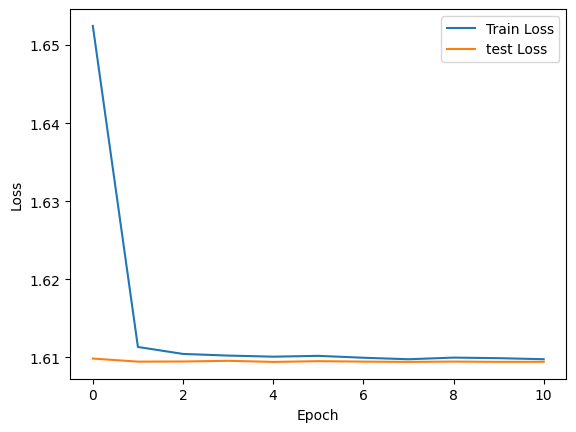

In [39]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses , label='test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()